**Zadatak 1**

In [11]:
# a)

from keras.datasets import cifar10

(trainX, trainy), (testX, testy) = cifar10.load_data()
print("Trening podaci:", trainX.shape)
print("Trening labele:", trainy.shape)
print("Test podaci", testX.shape)
print("Test labele", testy.shape)

Trening podaci: (50000, 32, 32, 3)
Trening labele: (50000, 1)
Test podaci (10000, 32, 32, 3)
Test labele (10000, 1)


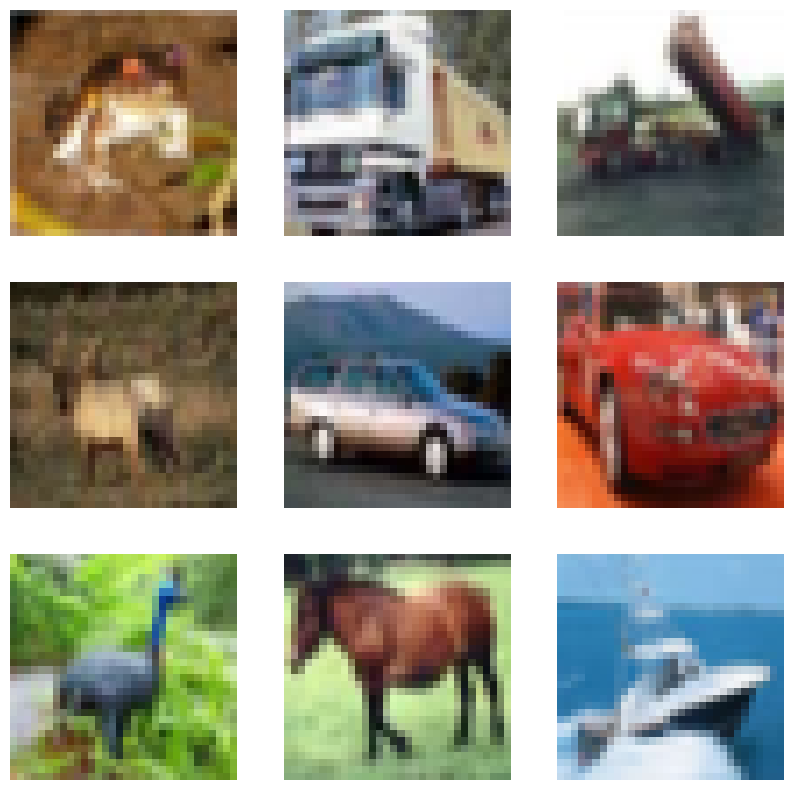

In [12]:
# b)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(trainX[i])
    plt.axis('off')
plt.show()

In [13]:
# c)

from keras.utils import to_categorical

trainy = to_categorical(trainy)
testy = to_categorical(testy)

print(trainy)

trainX = trainX.astype('float32') / 255
testX = testX.astype('float32')/255

print(trainX)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0

In [14]:
# d)

from keras import layers
from keras import models
from keras.optimizers import SGD

def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',  input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [15]:
# f)

model = define_model()
history = model.fit(trainX, trainy, epochs=15, batch_size=64, validation_data=(testX, testy))

_, accuracy = model.evaluate(testX, testy)
print("Tacnost: {:.2f}%".format(accuracy * 100))


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 232s 294ms/step - accuracy: 0.1741 - loss: 2.2028 - val_accuracy: 0.3006 - val_loss: 1.9807
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 258s 290ms/step - accuracy: 0.3670 - loss: 1.7741 - val_accuracy: 0.4219 - val_loss: 1.6373
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 231s 295ms/step - accuracy: 0.4362 - loss: 1.5701 - val_accuracy: 0.4906 - val_loss: 1.4277
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 257s 290ms/step - accuracy: 0.4920 - loss: 1.4322 - val_accuracy: 0.5110 - val_loss: 1.3750
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 227s 291ms/step - accuracy: 0.5228 - loss: 1.3460 - val_accuracy: 0.5263 - val_loss: 1.3380
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 268s 299ms/step - accuracy: 0.5536 - loss: 1.2649 - val_accuracy: 0.5554 - val_loss: 1.2535
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 264s 301ms/step - accuracy: 0.5795 - loss: 1.1939 - val_accuracy: 0.5714 - val_loss: 1.1993
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 226s 289ms/step - accuracy: 0.6062 -

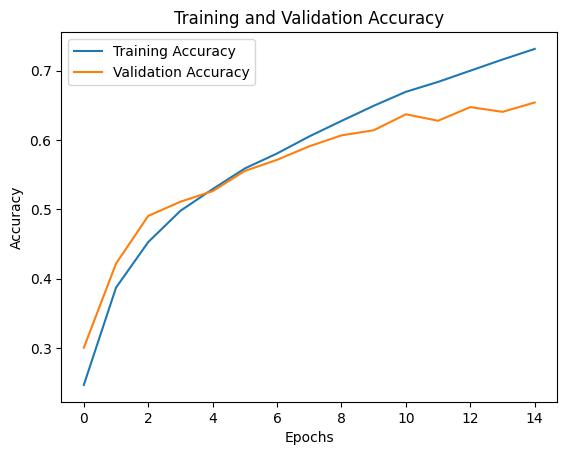

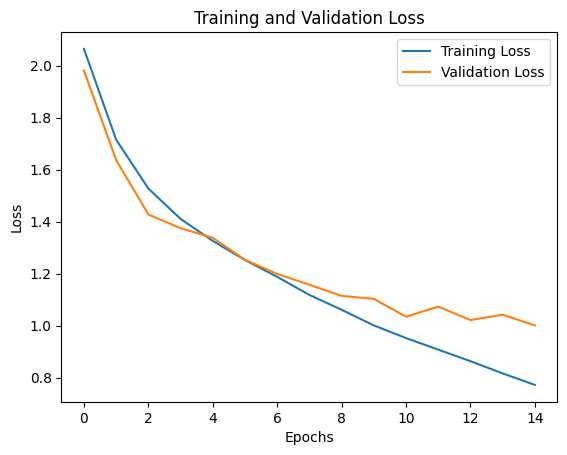

In [16]:
# g)

import matplotlib.pyplot as plt

history_dict = history.history

plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# h)

from keras.layers import Dropout

def define_model_with_dropout():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    opt = SGD(lr=0.001, momentum = 0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model_with_dropout()
history = model.fit(trainX, trainy, epochs=15, batch_size=64, validation_data=(testX, testy))

_, accuracy = model.evaluate(testX, testy)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

In [18]:
# i)

def define_final_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))

    opt = SGD(learning_rate=0.001, momentum = 0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_final_model()
history = model.fit(trainX, trainy, epochs=30, batch_size=64, validation_data=(testX, testy))

_, accuracy = model.evaluate(testX, testy)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 341s 432ms/step - accuracy: 0.1264 - loss: 2.2793 - val_accuracy: 0.2804 - val_loss: 2.0011
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 375s 423ms/step - accuracy: 0.2690 - loss: 1.9768 - val_accuracy: 0.3622 - val_loss: 1.7896
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 385s 428ms/step - accuracy: 0.3437 - loss: 1.7997 - val_accuracy: 0.4018 - val_loss: 1.6519
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 382s 428ms/step - accuracy: 0.3829 - loss: 1.6867 - val_accuracy: 0.4424 - val_loss: 1.5250
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 332s 425ms/step - accuracy: 0.4174 - loss: 1.5937 - val_accuracy: 0.4360 - val_loss: 1.5436
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 329s 421ms/step - accuracy: 0.4444 - loss: 1.5310 - val_accuracy: 0.4891 - val_loss: 1.4018
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 382s 421ms/step - accuracy: 0.4692 - loss: 1.4681 - val_accuracy: 0.5217 - val_loss: 1.3165
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 379s 418ms/step - accuracy: 0.4913 -

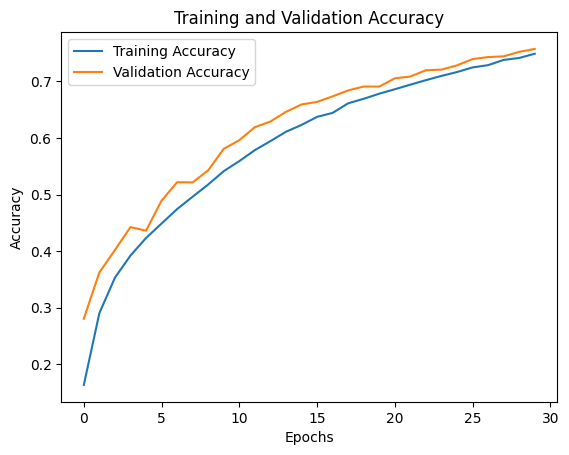

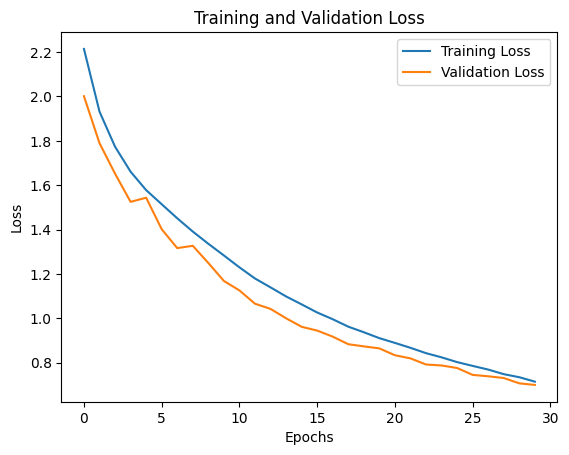

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history

plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()